# <center> <font size = 24 color = 'steelblue'>**Introduction to Audio Analytics**

###### <center> <font size = 12> 🔊  **Working with Audio in Python**
<center> <img src="https://drive.google.com/uc?export=view&id=1DKPdD-uOzaW6EmhCSFabV3kDgVURwtt8" width="600"/>

<div class="alert alert-block alert-info">
    
<font size = 4>

**By the end of this notebook you will be able to:**

- Learn about some important concepts in speech recognition    
- Understand how to load audio files in python environment
- Create visualizations
- Exploring features
- Prepare the data for machine learning
    </div>

##### <a id= 'p0'>
<font size = 4>
    
**Table of Contents:**<br>
[1. Python packages for audio analysis](#p1)<br>
[2. Important concepts](#p2)<br>
[3. Load the data](#p3)<br>
[4. Visualization of data](#p4)<br>
[5. Spectogram](#p5)<br>
[6. Mel spectogram](#p6)


## <a id = 'p1'>
<font size = 10 color = 'midnightblue'> **Python Packages**

<div class="alert alert-block alert-success">
<font size = 4>
    
- Numerous Python libraries, such as **Librosa**, **Pydub**, **pyAudioAnalysis**, **Playsound**, and **Mingus**, offer a wide range of capabilities for handling various tasks with audio files.
- Librosa is leveraged in this notebook.
    </div>

<div class="alert alert-block alert-success">
<font size = 4>
    
**Librosa:**

- Librosa, a Python package, is crafted for the analysis of music and audio.
- It provides crucial components required for constructing systems dedicated to music information retrieval.
    </div>

<font size = 5 color = seagreen> **Load the packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order.
from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

#itertools is a built-in module in Python for handling iterables.
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

[top](#p0)

###### <a id = 'p2'>
<font size = 10 color = 'midnightblue'> **Important concepts:**

<font size = 6 color = pwdrblue> **Audio in digital form:**

<div class="alert alert-block alert-success">
<font size = 4>

**Frequency**
- Frequency refers to the number of cycles of a sound wave that occur in one second, measured in Hertz (Hz).
- In speech recognition, the frequency of an audio signal is crucial for understanding the pitch and tone of the speaker's voice. Different phonemes and characteristics of speech are associated with specific frequency ranges.

<center><img src="https://drive.google.com/uc?export=view&id=1YuIMyjxSxM7SxndyXvnhr5D9AwNamTQv" width="400"/>

</div>

<div class="alert alert-block alert-success">
<font size = 4>

<b>Amplitude</b>
- Amplitude represents the maximum displacement of a wave from its equilibrium position and is related to the loudness of a sound.
- Amplitude is essential for understanding the volume and intensity of speech. It helps in identifying variations in loudness, which can carry important information, especially in conversational contexts.

<center><img src="https://drive.google.com/uc?export=view&id=1oiojaijjvxbfy6JcqgMJOBhIDeEgFC2L" width="400"/>

</div>


<div class="alert alert-block alert-success">
<font size = 4>
    
**Intensity**
- Intensity, in the context of sound, is the amount of energy carried by a sound wave, often perceived as loudness and measured in decibels (dB).
- Intensity is significant for recognizing the emphasis, stress, and emotional content in speech. It plays a role in distinguishing between different phonetic elements and conveying the speaker's intention.

<center><img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780124722804500162-f13-15-9780124722804.gif" width="400"/>

</div>

<div class="alert alert-block alert-success">
<font size = 4>
    
**Length of Audio File:**
- The length of an audio file refers to the duration of the recording, typically measured in seconds or minutes.
- The length of an audio file is a practical consideration in speech recognition systems.
- Longer audio files may require more computational resources, and the duration can impact the effectiveness of certain algorithms.
- It's also crucial for managing real-time processing requirements.


</div>

<div class="alert alert-block alert-success">
<font size = 4>
    
**Sample Rate**
- Sample rate refers to the number of samples of audio taken per second and is measured in Hertz (Hz).
- Sample rate is specific to how the computer reads in the audio file.
- Think of it as the "resolution" of the audio.
- The sample rate is crucial for accurately representing the analog audio signal in a digital form. Higher sample rates can capture more details, enhancing the precision of speech recognition systems.



<center><img src="https://drive.google.com/uc?export=view&id=1iY9-WpDdtnVOHGLidZAn-5B7Lh9pP7xC" width="400"/>


</div>

[top](#p0)

##### <a id = 'p3'>
<font size = 10 color = 'midnightblue'> **Loading Data**

<div class="alert alert-block alert-success">
<font size = 5 colro = seagreen>

Audio files are available in multiple formats like: `mp3`, `wav`, `m4a`, `flac`, `ogg`

<div class="alert alert-block alert-info">
<font size = 4>
    
**Note about the data used:**
- The data used here is the `Ryerson Audio-Visual Database of Emotional Speech and Song or RAVDESS`.
- The section of data used here comprises **1440 files**, resulting from **60 trials per actor multiplied by 24 actors**.
- The RAVDESS features 24 professional actors, evenly divided between 12 females and 12 males.
- These actors vocalize two lexically-matched statements in a neutral North American accent.
- Speech emotions included in the dataset encompass calm, happy, sad, angry, fearful, surprise, and disgust expressions.
- Each expression is generated at two levels of emotional intensity, namely normal and strong, with an additional neutral expression.

Citation: Livingstone SR, Russo FA (2018) The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS): A dynamic, multimodal set of facial and vocal expressions in North American English. PLoS ONE 13(5): e0196391. https://doi.org/10.1371/journal.pone.0196391.


</div>

In [2]:
pwd()

'/content'

In [12]:
from zipfile import ZipFile

with ZipFile('ravdess-emotional-speech-audio.zip', 'r') as f:
    f.extractall()

In [13]:
# Fetch all .wav files from the extracted folder structure
audio_files = glob('ravdess-emotional-speech-audio/Actor_*/*.wav')

In [14]:
if len(audio_files) > 0:
    display(ipd.Audio(audio_files[0]))
else:
    print("No audio files found.")

<font color = seagreen size = 5> <center><b>Looking at first few (10) records and printing shape of the array and sample rate.</b></center><br>

<div class="alert alert-block alert-success">
<font size = 4>
    
Here,
- `y` represents the audio time series (amplitude values) of the loaded audio file.
- `sr` represents the sample rate, which is the number of samples of audio per second.

 </div>

In [15]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 1.3254369e-06 -1.9536049e-06  3.4635209e-06 -1.6581294e-05
 -2.9569346e-05  3.5391449e-06 -4.2453148e-06 -1.0381998e-05
 -1.1653110e-05 -4.6277496e-06]
shape y: (74309,)
sr: 22050


[top](#p0)

##### <a id = 'p3'>
<font size = 10 color = 'midnightblue'><b>Visualization</b>

<div class="alert alert-block alert-success">
<font size = 4>     

- Generate a line plot of the raw audio time series using Pandas and Matplotlib.
- The resulting plot visualizes the amplitude values of the audio over time.
</div>

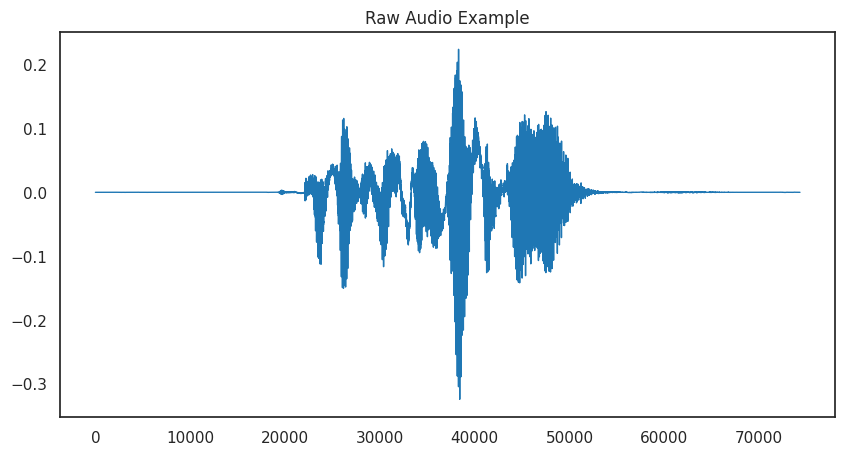

In [16]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

<div class="alert alert-block alert-success">
<font size = 4>
    
**Observations:**

- Use `librosa.effects.trim` function to trim silence from the audio time series y.
- `top_db=20` sets a threshold (in decibels) below which segments of the audio are considered silent and will be trimmed.
- The trimmed audio is stored in the variable `y_trimmed`, and the second variable `_` is used to discard the second output of the function, which represents the indices of the trimmed segments.

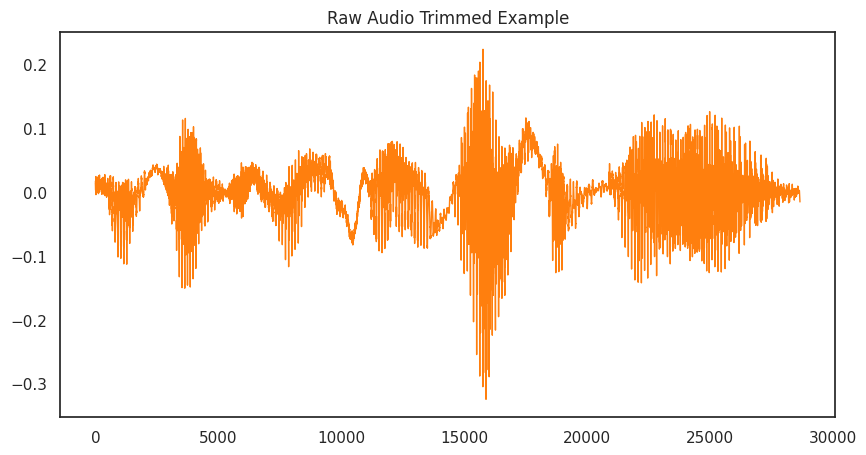

In [17]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

<div class="alert alert-block alert-success">
<font size = 4>

- Select a specific range of values from the original audio time series (y) and creates a line plot of that zoomed-in portion.
- The resulting plot provides a detailed view of the amplitude values within the specified index range, allowing for a closer examination of the audio waveform.

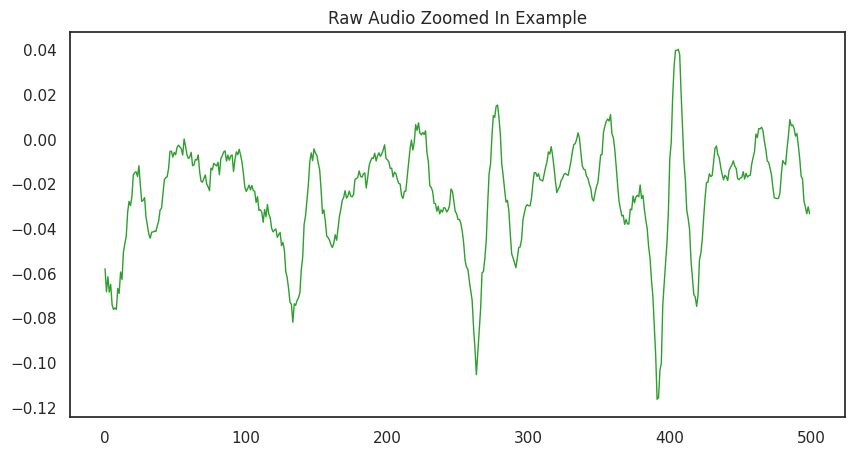

In [18]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

[top](#p0)

###### <a id = 'p5'>
<font size = 10 color = 'midnightblue'> **Spectogram**

<div class="alert alert-block alert-success">
<font size = 4>

- A spectrogram is a visual representation of the spectrum of frequencies in a signal as they vary with time.
- It provides a way to analyze the frequency content of a signal over different time intervals.
- Perform the Short-Time Fourier Transform (STFT) on the audio time series y using Librosa
- STFT and spectrogram conversion are critical steps in audio analytics, providing a rich representation of the frequency content over time. This representation is valuable for a wide range of applications
- The STFT is a powerful tool for extracting time-varying frequency information from an audio signal.
</div>

In [19]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 146)

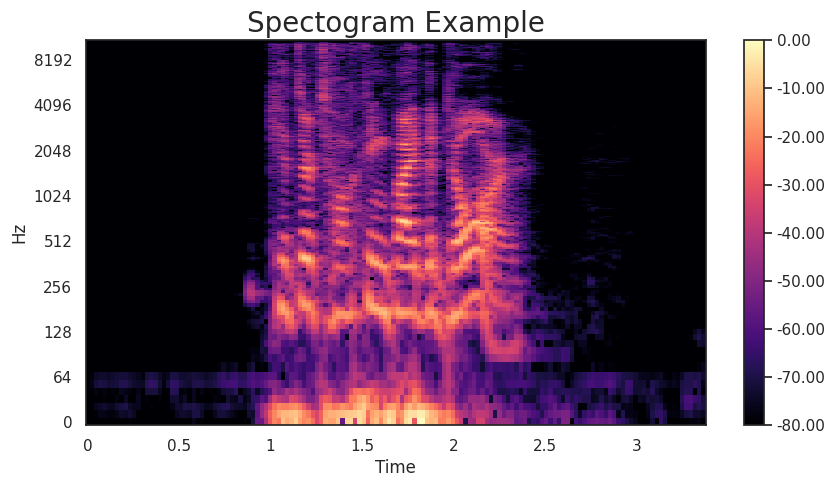

In [20]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

<div class="alert alert-block alert-success">
<font size = 4>

**Here are the key components of a spectrogram:**

- **X-Axis (Horizontal Axis):**
    - Represents time.
    - The signal is divided into short time intervals, and each column in the spectrogram corresponds to the frequency content of the signal during that specific time interval.

- **Y-Axis (Vertical Axis)**:
    - Represents frequency.
    - The vertical axis shows the frequency range covered by the analysis, usually from low to high frequencies.

- **Color or Intensity:**
    - The color or intensity of each point in the spectrogram represents the amplitude or power of the corresponding frequency component at a specific time.
    - Brighter or more intense colors usually indicate higher amplitudes.

- **Frequency Resolution:**
    - The width of the frequency bins in the spectrogram determines the frequency resolution.
    - Narrower bins provide better frequency resolution but may result in a loss of time resolution.

- **Time Resolution:**
    - The length of the time intervals, or windows, used in the analysis determines the time resolution.
    - Shorter windows provide better time resolution but may result in a loss of frequency resolution.

[top](#p0)

###### <a id = 'p6'>
<font size = 10 color = 'midnightblue'> **Mel Spectogram**

<div class="alert alert-block alert-success">
<font size = 4>
    
- Mel spectrograms play a crucial role in audio analytics, particularly in tasks related to human auditory perception.
- Use `librosa.feature.melspectrogram` to compute the mel spectrogram S.
</div>

In [21]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

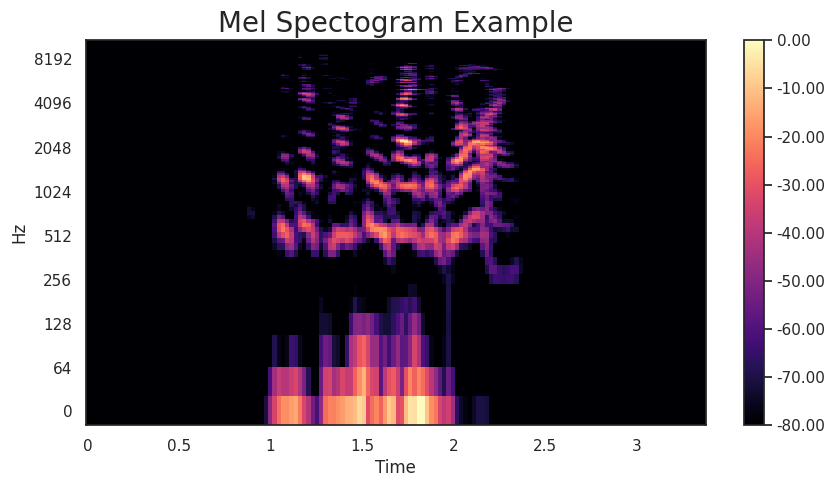

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [23]:
S_db_mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

[top](#p0)

<div class="alert alert-block alert-success">
<font size = 4>

<center>    <b>We can run the above for the whole dataset and create features for any ML algorithm 😃</b>
</div>